In [2]:
# Importing libraries for classic Python operations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import libraries for data pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Importing libraries for model selection
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

# Importing libraries for results analysis
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import seaborn

from xgboost import plot_importance
from xgboost import plot_tree
from matplotlib.pylab import rcParams

# Importing the library for the model under test
from xgboost import XGBClassifier

import pickle

# XGBoost 

## I) Theory

XGBoost is a gradient boosting ensemble Machine Learning technique based on decision trees.
We've already seen what the terms decision tree, bagging and random forest mean in the Random Forest section, so let's take a closer look at what's new in XGBoost.

### 1) What does boosting mean ?

Boosting is an ensemble strategy that adds new models to repair faults generated by current models. First, a model is constructed using the training data. The second model is then constructed in an attempt to address the faults in the previous model and models are added sequentially until no further advancements are possible. This ensemble method attempts to build a powerful classifier using previously 'weaker' classifiers.

### 2) What does gradient means ?

Gradient boosting is so named because it employs a gradient descent approach to minimize loss when adding new models.

### 3) What does eXtreme mean

XGBoost (eXtreme Gradient Boosting) is an advanced implementation of a gradient boosting algorithm.

### 4) XGBoost vs Gradient Boosting

Gradient Boosting with XGBoost is a more regularized version of Gradient Boosting. XGBoost employs sophisticated regularization (L1 & L2) to increase model generalization.

When compared to Gradient Boosting, XGBoost provides superior performance. It has a very rapid training time and can be parallelized across clusters.

## II) Advantages and Drawbacks

Advantages

-  XGBoost Execution Speed:
XGBoost is generally quick compared to other gradient boosting implementations.

- Performance: XGBoost has a strong track record of producing high-quality results in various machine learning tasks, especially in Kaggle competitions, where it has been a popular choice for winning solutions.

- Regularization :
Standard GBM implementation has no regularization like XGBoost; therefore, it also helps to reduce overfitting. In fact, XGBoost is also known as a ‘regularized boosting‘ technique.

- High Flexibility:
XGBoost allows users to define custom optimization objectives and evaluation criteria. This adds a whole new dimension to the model and there is no limit to what we can do.

- Handling Missing Values:
XGBoost has an in-built routine to handle missing values. The user is required to supply a different value than other observations and pass that as a parameter. XGBoost tries different things as it encounters a missing value on each node and learns which path to take for missing values in the future.

- Interpretability: Unlike some machine learning algorithms that can be difficult to interpret, XGBoost provides feature importances, allowing for a better understanding of which variables are most important in making predictions.

Drawbacks

- Computational Complexity:
XGBoost can be computationally intensive, especially when training large models, making it less suitable for resource-constrained systems.

- Overfitting: XGBoost can be prone to overfitting, especially when trained on small datasets or when too many trees are used in the model

- Hyperparameter Tuning: XGBoost has many hyperparameters that can be adjusted, making it important to properly tune the parameters to optimize performance. However, finding the optimal set of parameters can be time-consuming and requires expertise.

- Memory Requirements: XGBoost can be memory-intensive, especially when working with large datasets, making it less suitable for systems with limited memory resources.

## III) Python Implementation

### 1) Hyperparameters tuning

#### General Parameters

The general parameter are here to access overall functionalities

- booster Select the type of model to run at each iteration. It has 2 options:
gbtree: tree-based models
gblinear: linear models

We will use in this project tree-based models due to its performance

#### Booster Parameters for Tree Booster

There are 2 types of booster parameters, one for linear and another for tree but we will only consider tree booster here.

1. Eta is also known as the learning rate; changing this number makes the model more robust by decreasing the weights on each step.

2. Max_depth, it is the same as what we saw for the random forest

3. gamma 
Only when the resulting split results in a positive reduction in the loss function is a node split. The minimal loss reduction necessary to divide is specified by Gamma. This makes the algorithm more conservative. The values can and should change based on the loss function.

4. subsample 
The percentage of observations that are random samples for each tree. Lower values make the algorithm more conservative and prevent overfitting, but too low values may result in underfitting.

5. colsample_bytree, it is the same as max_features for random forest


#### Learning Task Parameters

1. objective 
This defines the loss function to be minimized. We will use "multi: softmax" which is a multiclass classification using the softmax objective. It will return predicted class.

2. eval_metric 
The evaluation metrics are to be used for validation data.
merror – Multiclass classification error rate 
mlogloss – Multiclass logloss.


In [5]:
df = pd.read_csv(r'C:\Users\Thomas Aujoux\Documents\GitHub\food-classification\Data_Preprocessing\data_clean\clean.csv', index_col=[0])
df = df.drop(labels=22426, axis=0)

y = df[["Secteur"]]
df_features = df.drop(["Code_produit", "Secteur", "Famille"], axis=1)
le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(df_features, y, test_size=0.2, shuffle=True, random_state=42)
print(f'The training dataset has {len(X_train)} records.')
print(f'The testing dataset has {len(X_test)} records.')

df

C:\Users\Thomas Aujoux\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The training dataset has 52637 records.
The testing dataset has 13160 records.


,Code_produit,Secteur,Famille,abricot,acidifi,acidifi acidifi,acidifi arom,acidit,acidit correcteur,agent,...,vierg extra,vin,vin blanc,vinaigr,vinaigr alcool,vitamin,vitamin b,vitamin vitamin,volaill,yaourt
0,450.0,Produits laitiers et desserts frais,Yaourts et laits fermentes sucres classiques,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.444006,0.391154,0.0,0.0,0.120811
1,453.0,Produits laitiers et desserts frais,Yaourts et laits fermentes sucres classiques,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.520215
2,455.0,Produits laitiers et desserts frais,Yaourts et laits fermentes sucres classiques,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.203785,0.000000,0.0,0.0,0.443586
3,456.0,Produits laitiers et desserts frais,Yaourts et laits fermentes sucres classiques,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.216877,0.000000,0.0,0.0,0.472086
4,460.0,Produits laitiers et desserts frais,Fromages frais nature non sucres gourmands,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65793,101536.0,Sirops et boissons concentrees a diluer,Sirops,0.0,0.123552,0.0,0.202101,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
65794,101537.0,Sirops et boissons concentrees a diluer,Sirops,0.0,0.066703,0.0,0.109110,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
65795,101540.0,Sirops et boissons concentrees a diluer,Sirops,0.0,0.149115,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
65796,101542.0,Sirops et boissons concentrees a diluer,Sirops,0.0,0.145015,0.0,0.237209,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000


### 2) Study of the various hyperparameters

Next, we'll look at each of the hyperparameters to understand the consequences of changing them on the model.

#### Maximum Depth

In [9]:
opt_table_estimators_accuracy=list()
opt_table_estimators_f1=list()
list_para = [3, 6, 10, 15, 20, 50, 100, 200, 300, 500, 900]

for i in list_para:
    print(i)
    model = XGBClassifier(tree_method="gpu_hist", objective='multi:softmax',num_class=31)
    model.fit(X_train,y_train)
    output=model.predict(X_test)
    opt_table_estimators_accuracy.append(accuracy_score(y_test, output))
    opt_table_estimators_f1.append(f1_score(y_test, output, average='macro'))
    print(accuracy_score(y_test, output),f1_score(y_test, output, average='macro'))
plt.plot(list_para, opt_table_estimators_accuracy)
plt.plot(list_para, opt_table_estimators_f1)
plt.xlabel('Number of trees')
plt.ylabel('Random Forest Score')
plt.title('Random Forest Score VS Number of trees (5 features)')
plt.show()

3
0.9797872340425532 0.9757144521714064
6


KeyboardInterrupt: 

In [12]:
opt_table_estimators_accuracy=list()
opt_table_estimators_f1=list()
list_para = [5, 10, 100, 300, 500, 900]

for i in list_para:
    print(i)
    model = XGBClassifier(max_depth = i, tree_method="gpu_hist", objective='multi:softmax',num_class=31)
    model.fit(X_train,y_train)
    output=model.predict(X_test)
    opt_table_estimators_accuracy.append(accuracy_score(y_test, output))
    opt_table_estimators_f1.append(f1_score(y_test, output, average='macro'))
    print(accuracy_score(y_test, output),f1_score(y_test, output, average='macro'))
plt.plot(list_para, opt_table_estimators_accuracy)
plt.plot(list_para, opt_table_estimators_f1)
plt.xlabel('Number of trees')
plt.ylabel('Random Forest Score')
plt.title('Random Forest Score VS Number of trees (5 features)')
plt.show()

5


KeyboardInterrupt: 

We can analyze the maximum depth as follows: before the maximum depth is 10, our model underfits, and after 10, it overfits. This analysis has enabled us to find a good estimate of this parameter. The number we can estimate as satisfactory is 10.

#### Learning Rate

0.001
0.8963525835866262 0.8684325442549037
0.01
0.9418693009118541 0.9249213389472929
0.05
0.9689209726443769 0.9611452905308623
0.1
0.976063829787234 0.9699161188129864
0.2
0.9795592705167173 0.9743519007580592
0.3
0.9797872340425532 0.9757144521714064
0.4
0.9777355623100304 0.9721663114782716
0.6
0.9717325227963526 0.965655458487846
0.8
0.9533434650455928 0.9458493662900717


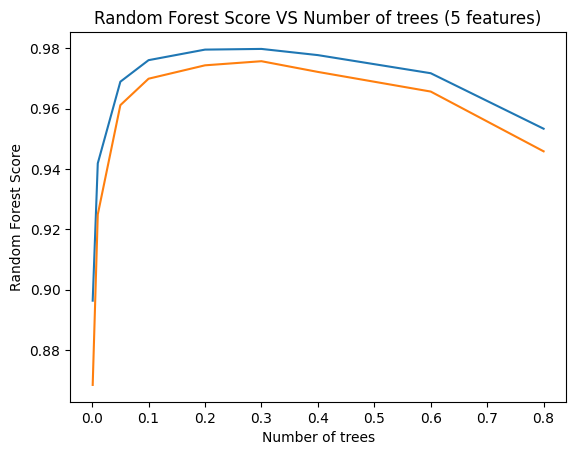

In [13]:
opt_table_estimators_accuracy=list()
opt_table_estimators_f1=list()
list_para = [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.6, 0.8]

for i in list_para:
    print(i)
    model = XGBClassifier(learning_rate = i, tree_method="gpu_hist", objective='multi:softmax',num_class=31)
    model.fit(X_train,y_train)
    output=model.predict(X_test)
    opt_table_estimators_accuracy.append(accuracy_score(y_test, output))
    opt_table_estimators_f1.append(f1_score(y_test, output, average='macro'))
    print(accuracy_score(y_test, output),f1_score(y_test, output, average='macro'))
plt.plot(list_para, opt_table_estimators_accuracy)
plt.plot(list_para, opt_table_estimators_f1)
plt.xlabel('Number of trees')
plt.ylabel('Random Forest Score')
plt.title('Random Forest Score VS Number of trees (5 features)')
plt.show()

We can say the same thing, the optimal number for the learning rate is 0.6.

#### Gama

0
0.9797872340425532 0.9757144521714064
0.01
0.9802431610942249 0.9763373359172257
0.1
0.9791033434650456 0.9738112787403161
1
0.9727203647416414 0.965628136961025
10
0.9492401215805472 0.935214871418529


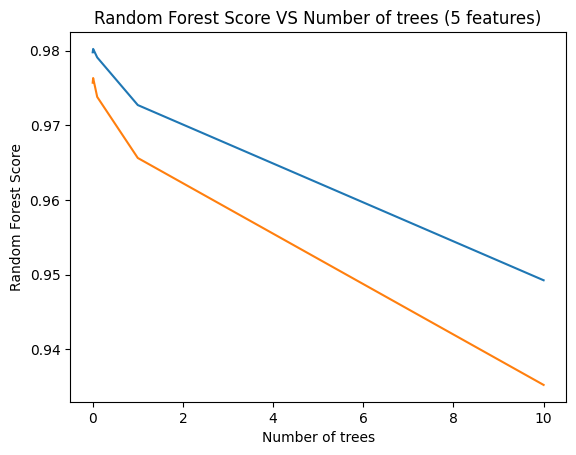

In [16]:
opt_table_estimators_accuracy=list()
opt_table_estimators_f1=list()
list_para = [0, 0.01, 0.1, 1, 10]

for i in list_para:
    print(i)
    model = XGBClassifier(gamma = i, tree_method="gpu_hist", objective='multi:softmax',num_class=31)
    model.fit(X_train,y_train)
    output=model.predict(X_test)
    opt_table_estimators_accuracy.append(accuracy_score(y_test, output))
    opt_table_estimators_f1.append(f1_score(y_test, output, average='macro'))
    print(accuracy_score(y_test, output),f1_score(y_test, output, average='macro'))
plt.plot(list_para, opt_table_estimators_accuracy)
plt.plot(list_para, opt_table_estimators_f1)
plt.xlabel('Number of trees')
plt.ylabel('Random Forest Score')
plt.title('Random Forest Score VS Number of trees (5 features)')
plt.show()

For the Gamma parameter it is 1

#### Subsample

0.1
0.9698328267477203 0.9629841015336423
0.2
0.9749240121580547 0.9690024763352991
0.30000000000000004
0.9771276595744681 0.9719688966442374
0.4
0.9770516717325228 0.9715746527366764
0.5
0.9785714285714285 0.9737267348630311
0.6
0.9792553191489362 0.9749845940931946
0.7000000000000001
0.9792553191489362 0.9749253086991336
0.8
0.9806231003039514 0.9758205627626221
0.9
0.9800911854103344 0.9759052746930477


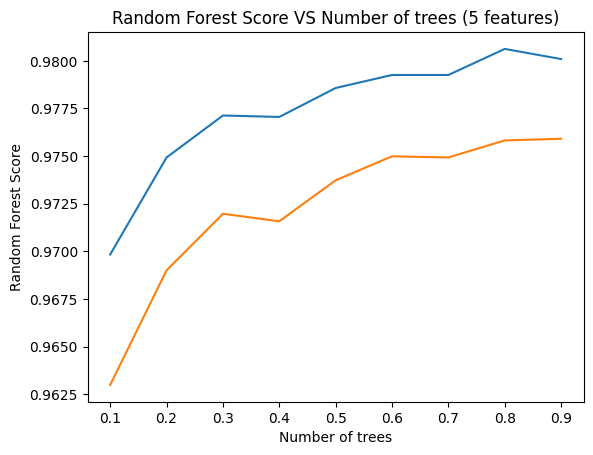

In [24]:
opt_table_estimators_accuracy=list()
opt_table_estimators_f1=list()
list_para = np.arange(0.1, 1.0, 0.1)

for i in list_para:
    print(i)
    model = XGBClassifier(subsample = i, tree_method="gpu_hist", objective='multi:softmax',num_class=31)
    model.fit(X_train,y_train)
    output=model.predict(X_test)
    opt_table_estimators_accuracy.append(accuracy_score(y_test, output))
    opt_table_estimators_f1.append(f1_score(y_test, output, average='macro'))
    print(accuracy_score(y_test, output),f1_score(y_test, output, average='macro'))
plt.plot(list_para, opt_table_estimators_accuracy)
plt.plot(list_para, opt_table_estimators_f1)
plt.xlabel('Number of trees')
plt.ylabel('Random Forest Score')
plt.title('Random Forest Score VS Number of trees (5 features)')
plt.show()

The optimal parameter for the subsample is 0.8

#### Colsample by Tree

0.1
0.9764437689969605 0.9701580623195195
0.2
0.9780395136778115 0.9727722505297541
0.30000000000000004
0.9814589665653496 0.978029305925294
0.4
0.979483282674772 0.9755655917034417
0.5
0.9804711246200608 0.9756724494444124
0.6
0.9803951367781155 0.976443861822524
0.7000000000000001
0.9792553191489362 0.9749753294472647
0.8
0.9792553191489362 0.975802988498941
0.9
0.9796352583586626 0.9757458150555168


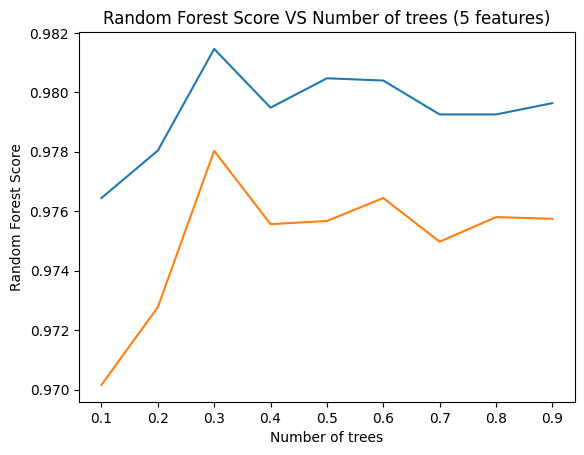

In [25]:
opt_table_estimators_accuracy=list()
opt_table_estimators_f1=list()
list_para = np.arange(0.1, 1.0, 0.1)

for i in list_para:
    print(i)
    model = XGBClassifier(colsample_bytree = i, tree_method="gpu_hist", objective='multi:softmax',num_class=31)
    model.fit(X_train,y_train)
    output=model.predict(X_test)
    opt_table_estimators_accuracy.append(accuracy_score(y_test, output))
    opt_table_estimators_f1.append(f1_score(y_test, output, average='macro'))
    print(accuracy_score(y_test, output),f1_score(y_test, output, average='macro'))
plt.plot(list_para, opt_table_estimators_accuracy)
plt.plot(list_para, opt_table_estimators_f1)
plt.xlabel('Number of trees')
plt.ylabel('Random Forest Score')
plt.title('Random Forest Score VS Number of trees (5 features)')
plt.show()

Apparagent for the parameter colsample by tree the model doesn't manage to overfitter, in which case we can't yet find an ideal parameter. So we're going to introduce Grid Search.
### 3) Grid Search automatisation

In [28]:
params = {'max_depth': [10],
            'learning_rate': [0.3],
            'gamma': [0.001],
            'subsample': [0.8],
            'colsample_bytree': [0.3],
            'eval_metric': ['mlogloss']
            }

model = XGBClassifier


def model_best_param(X_train, X_test, y_train, y_test, model, params):

    pipe_nb = make_pipeline(
    model(num_class=31, objective='multi:softmax', tree_method="gpu_hist")
    )
    grid_search = GridSearchCV(estimator=model(), param_grid=params, verbose=2, cv=2, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    output = grid_search.predict(X_test)
    
    output = le.inverse_transform(output)
    y_test = le.inverse_transform(y_test)

    conf_mat = confusion_matrix(y_test, output)
    conf_mat = pd.DataFrame(conf_mat, index=pd.unique([item for sublist in y_test.values for item in sublist]), columns= pd.unique([item for sublist in y_test.values for item in sublist]))

    print(classification_report(y_test, output))

    return(grid_search.best_params_, conf_mat)

grid_search = model_best_param(X_train, X_test, y_train, y_test, model, params)
grid_search



Fitting 2 folds for each of 1 candidates, totalling 2 fits


KeyboardInterrupt: 

### 4) Analysis of the best model

In [52]:
model = XGBClassifier(
    objective='multi: softprob',
    max_depth = 6,
    learning_rate = 0.3,
    gamma = 0.001,
    subsample = 0.8,
    colsample_bytree = 0.3,
    eval_metric = 'mlogloss'
)

model.fit(X_train, y_train)
output = model.predict(X_test)
output = le.inverse_transform(output)
y_test = le.inverse_transform(y_test)

conf_mat = confusion_matrix(y_test, output)
conf_mat = pd.DataFrame(conf_mat, index=pd.unique([item for sublist in pd.DataFrame(y_test).values for item in sublist]), columns= pd.unique([item for sublist in pd.DataFrame(y_test).values for item in sublist]))

ValueError: y contains previously unseen labels: ['Aliments infantiles de diversification' 'Aperitifs a croquer'
 'Barres cerealieres' 'Biscuits et gateaux industriels'
 'Boissons Rafraichissantes Sans Alcool' 'Bouillons et potages'
 'Cereales pour le petit dejeuner' 'Charcuterie'
 'Chocolat et produits chocolates' 'Compotes' 'Confiseries' 'Confitures'
 'Conserves de fruits' 'Fromages' 'Glaces et sorbets' 'Jus et nectars'
 'Laits infantiles' 'Margarines' 'Panification croustillante et moelleuse'
 'Plats cuisines ambiants' 'Plats cuisines frais'
 'Plats cuisines surgeles' 'Preparations pour desserts'
 'Produits laitiers et desserts frais' 'Produits traiteurs frais'
 'Produits transformes a base de pomme de terre' 'Sauces chaudes'
 'Sauces condimentaires' 'Sirops et boissons concentrees a diluer'
 'Snacking surgele' 'Viennoiseries et desserts surgeles']

In [37]:
conf_mat = pd.DataFrame(conf_mat, index=pd.unique([item for sublist in pd.DataFrame(y_test).values for item in sublist]), columns= pd.unique([item for sublist in pd.DataFrame(y_test).values for item in sublist]))

In [36]:
pd.DataFrame(y_test).values

array([['Compotes'],
       ['Confiseries'],
       ['Biscuits et gateaux industriels'],
       ...,
       ['Glaces et sorbets'],
       ['Produits laitiers et desserts frais'],
       ['Plats cuisines ambiants']], dtype=object)

In [39]:
print(classification_report(y_test, output))

                                               precision    recall  f1-score   support

       Aliments infantiles de diversification       0.97      0.93      0.95       184
                          Aperitifs a croquer       0.96      0.96      0.96       332
                           Barres cerealieres       0.98      0.91      0.94        64
              Biscuits et gateaux industriels       0.98      0.99      0.99      1346
        Boissons Rafraichissantes Sans Alcool       0.98      0.98      0.98       450
                         Bouillons et potages       0.96      0.88      0.92       267
              Cereales pour le petit dejeuner       0.97      0.99      0.98       255
                                  Charcuterie       0.99      0.99      0.99       547
              Chocolat et produits chocolates       0.98      0.98      0.98       332
                                     Compotes       0.99      0.98      0.98       387
                                  Confiser

In [41]:
pd.set_option('display.max_columns', None)
conf_mat

,Compotes,Confiseries,Biscuits et gateaux industriels,Chocolat et produits chocolates,Produits traiteurs frais,Glaces et sorbets,Plats cuisines ambiants,Charcuterie,Sirops et boissons concentrees a diluer,Produits transformes a base de pomme de terre,Produits laitiers et desserts frais,Fromages,Boissons Rafraichissantes Sans Alcool,Jus et nectars,Plats cuisines surgeles,Snacking surgele,Aperitifs a croquer,Cereales pour le petit dejeuner,Plats cuisines frais,Confitures,Panification croustillante et moelleuse,Sauces chaudes,Viennoiseries et desserts surgeles,Conserves de fruits,Aliments infantiles de diversification,Sauces condimentaires,Barres cerealieres,Bouillons et potages,Margarines,Laits infantiles,Preparations pour desserts
Compotes,172,0,0,2,1,2,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0
Confiseries,0,319,0,3,0,0,0,0,0,0,3,0,0,0,0,0,0,0,5,0,0,0,1,0,0,1,0,0,0,0,0
Biscuits et gateaux industriels,0,0,58,0,0,0,3,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Chocolat et produits chocolates,0,0,0,1339,0,0,0,0,1,0,1,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0
Produits traiteurs frais,1,0,0,0,443,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
Glaces et sorbets,0,0,0,0,0,235,0,0,0,0,0,0,0,0,0,0,0,0,0,11,1,14,0,0,1,0,5,0,0,0,0
Plats cuisines ambiants,0,0,1,0,0,0,252,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
Charcuterie,0,0,0,0,0,0,0,543,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,1,0,0,0,0,0,0
Sirops et boissons concentrees a diluer,0,0,0,7,0,0,0,0,324,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Produits transformes a base de pomme de terre,3,0,0,0,0,0,0,0,0,379,0,1,1,0,0,1,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0


In [48]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(20, 12))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [55]:
y_train, y_pred

(array([24,  8,  3, ...,  3, 23,  5]),
 array([0, 3, 2, 0, 7, 5, 9, 0, 2, 7, 2, 9, 2, 3, 3, 2, 3, 4, 1, 2, 9, 1,
        4, 6, 8, 2, 3, 0, 0, 6, 0, 6, 3, 3, 8, 8, 8, 2, 3, 2, 0, 8, 8, 3,
        8, 2, 8, 4, 3, 0, 4, 3, 6, 9, 8, 0, 8, 5, 9, 0, 9, 6, 5, 3, 1, 8,
        0, 4, 9, 6, 5, 7, 8, 8, 9, 2, 8, 6, 6, 9, 1, 6, 8, 8, 3, 2, 3, 6,
        3, 6, 5, 7, 0, 8, 4, 6, 5, 8, 2, 3]))

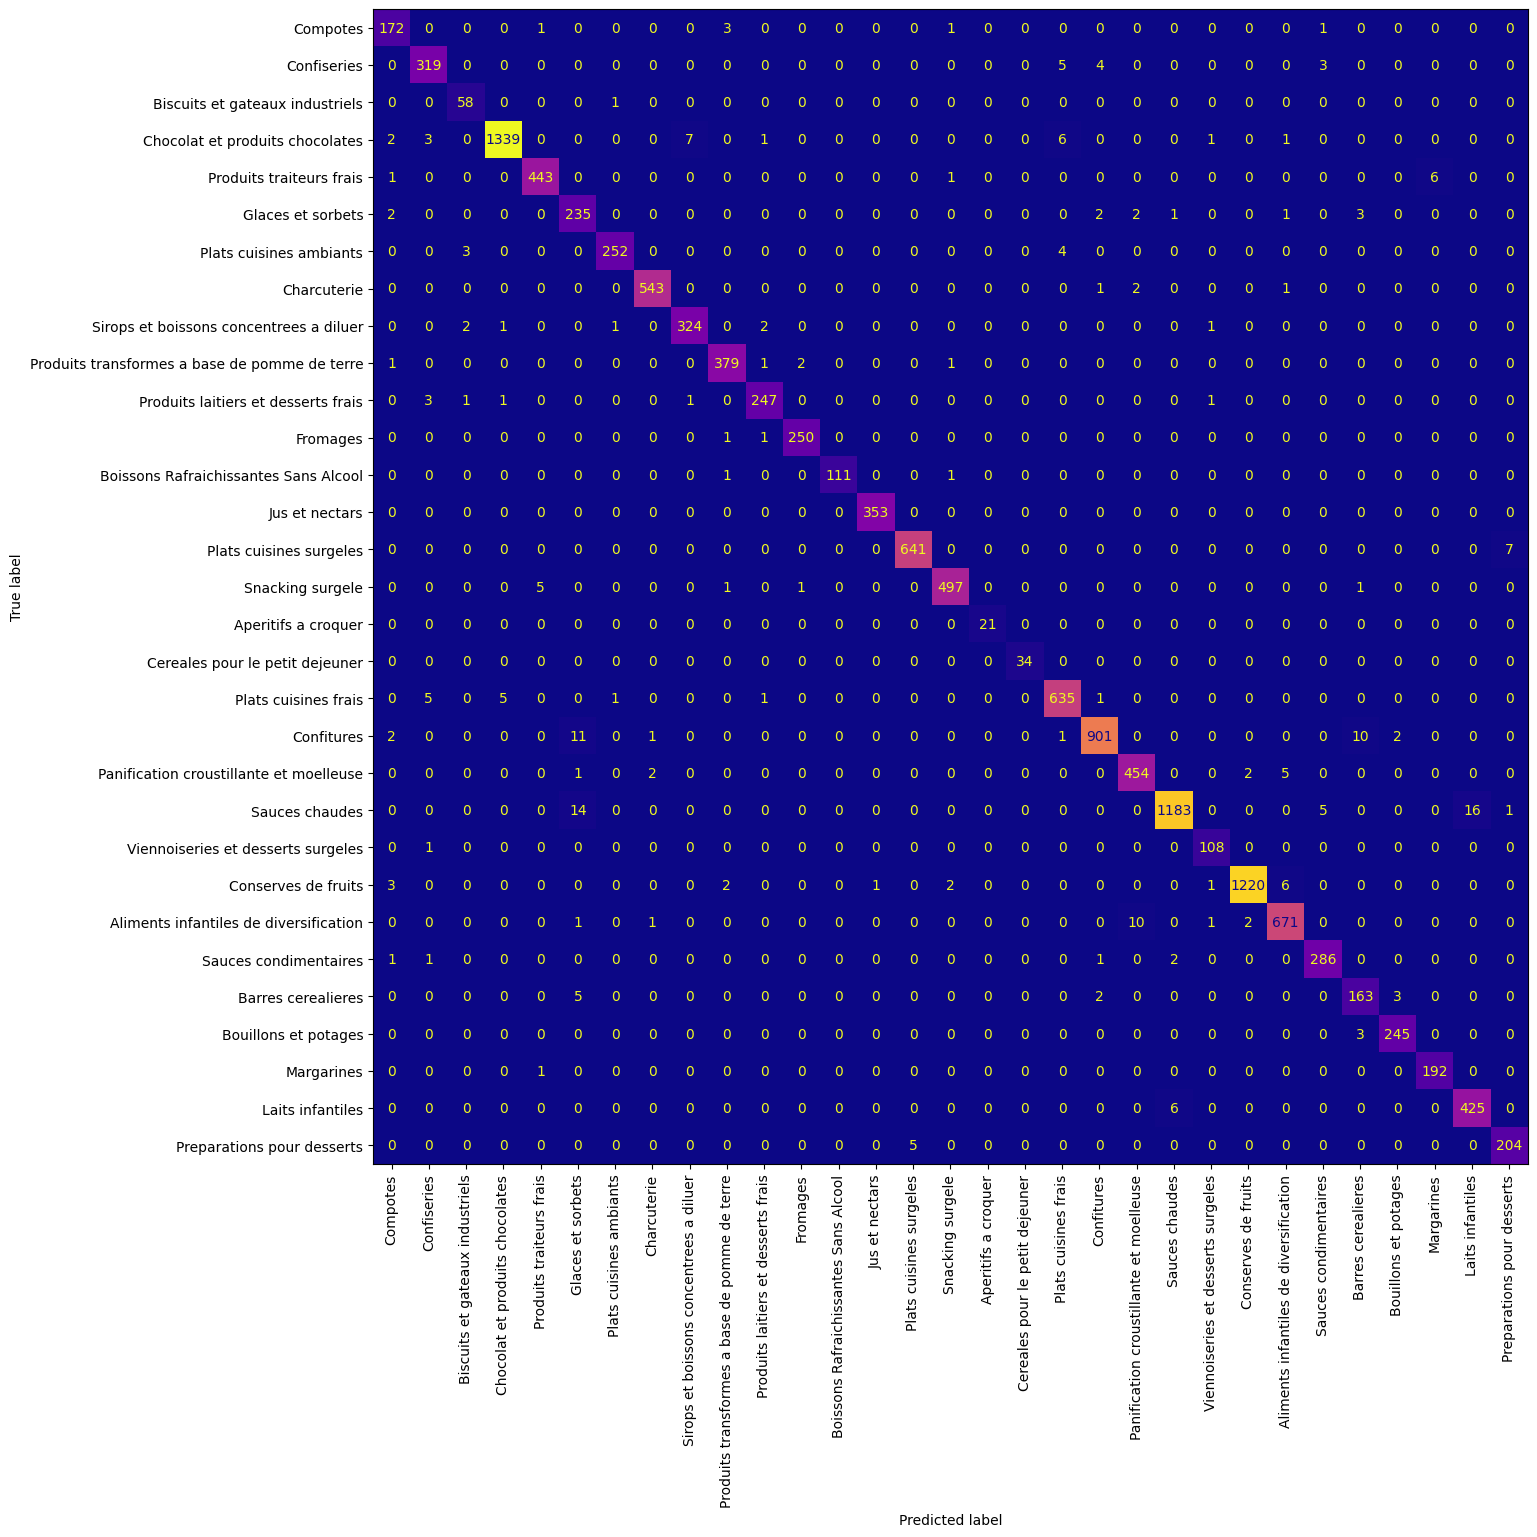

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
np.random.seed(0)


fig, ax = plt.subplots(figsize=(15, 15))
ConfusionMatrixDisplay.from_predictions(
    output, y_test, display_labels=pd.unique([item for sublist in pd.DataFrame(y_test).values for item in sublist]), xticks_rotation="vertical",
    ax=ax, colorbar=False, cmap="plasma")

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

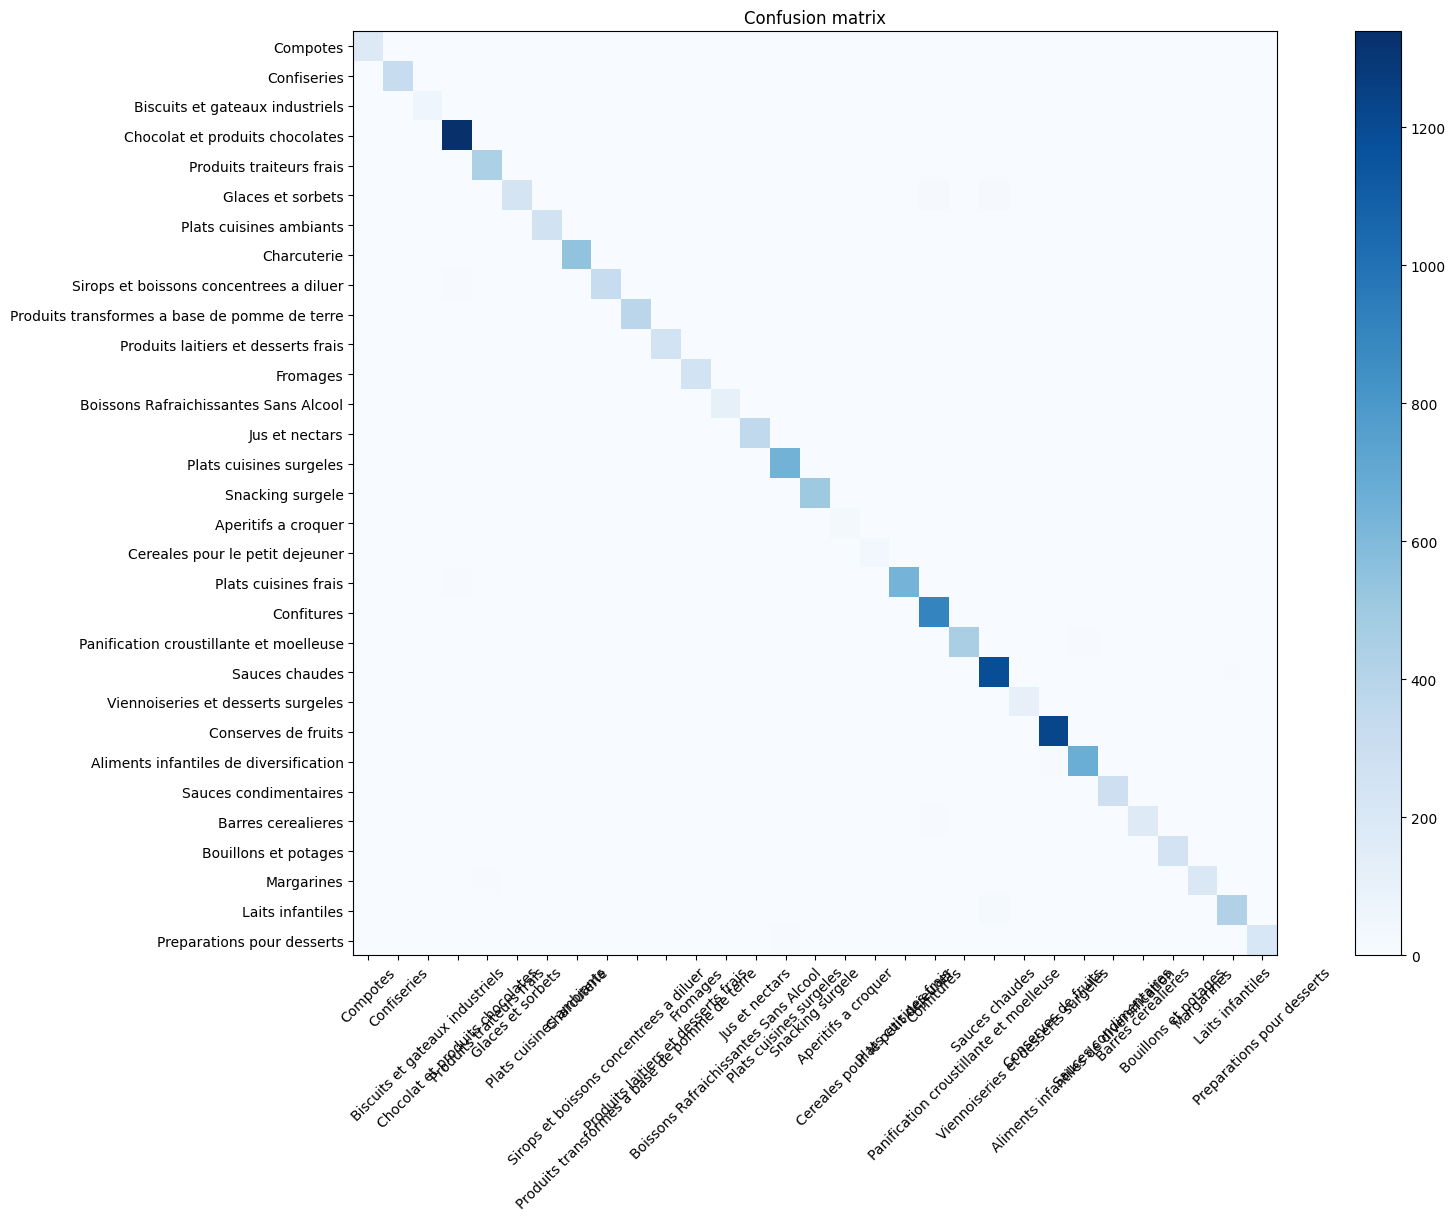

In [49]:
plot_confusion_matrix(conf_mat,
                          pd.unique([item for sublist in pd.DataFrame(y_test).values for item in sublist]),
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True)


In [ ]:
fig, ax = plt.subplots(figsize=(9,5))
plot_importance(model, ax=ax)
plt.show()